<h1 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Movie Plot Summarizer</h1>
<h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >EDA and Preprocessing</h1>

<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Data Loading](#1)
* [2. Data Preprocessing/EDA](#2)
    * [2.1 Tokenization for neural networks](#2.1)
* [3. EDA](#3)
    * [3.1 Determine appropriate length for summary](#3.1)
* [4. Summary](#4)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import ast
import statistics       
from bs4 import BeautifulSoup 
import nltk
from nltk.corpus import stopwords   
nltk.download('stopwords')

# pd.set_option("display.max_colwidth", 200)
# warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rotzn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id = '1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Loading</h3>

In [2]:
df = pd.read_csv('../data/df.csv')

In [3]:
df.head()

,Release Year,Title,Plot,Overview
0,1902,Jack and the Beanstalk,The earliest known adaptation of the classic f...,Abbott and Costello's version of the famous fa...
1,1903,Alice in Wonderland,"Alice follows a large white rabbit down a ""Rab...","On a golden afternoon, young Alice follows a W..."
2,1903,The Great Train Robbery,The film opens with two bandits breaking into ...,The clerk at the train station is assaulted an...
3,1905,The Night Before Christmas,Scenes are introduced using lines of the poem....,A cartoon based on the works of Nikolay Gogol....
4,1906,Dream of a Rarebit Fiend,The Rarebit Fiend gorges on Welsh rarebit at a...,Adapted from Winsor McCay's films and comics o...


In [4]:
df

,Release Year,Title,Plot,Overview
0,1902,Jack and the Beanstalk,The earliest known adaptation of the classic f...,Abbott and Costello's version of the famous fa...
1,1903,Alice in Wonderland,"Alice follows a large white rabbit down a ""Rab...","On a golden afternoon, young Alice follows a W..."
2,1903,The Great Train Robbery,The film opens with two bandits breaking into ...,The clerk at the train station is assaulted an...
3,1905,The Night Before Christmas,Scenes are introduced using lines of the poem....,A cartoon based on the works of Nikolay Gogol....
4,1906,Dream of a Rarebit Fiend,The Rarebit Fiend gorges on Welsh rarebit at a...,Adapted from Winsor McCay's films and comics o...
...,...,...,...,...
14659,2010,Five Minarets in New York,The film follows two anti-terror officers from...,Two Turkish anti-terrorist agents are sent to ...
14660,2011,Love Likes Coincidences,"One September morning in 1977 in Ankara, a you...","Year 1977, a September morning in Ankara... Yi..."
14661,2011,Once Upon a Time in Anatolia,"Through the night, three cars carry a small gr...",A group of men set out in search of a dead bod...
14662,2014,Winter Sleep,"Aydın, a former actor, owns a mountaintop hote...","Aydin, a retired actor, owns a small hotel in ..."


<a id = '2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">EDA</h3>

<a id = '2.1'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Determine appropriate length for summary</h3>

In [5]:
def determine_avg_length(dataframe, column):
    lengths = []
    for x in dataframe[column]:
        try:
            i = x.split(" ")
            lengths.append(len(i))
        except:
            continue
    return statistics.mean(lengths)


def determine_max_length(dataframe, column):
    lengths = []
    for x in dataframe[column]:
        try:
            i = x.split(" ")
            lengths.append(len(i))
        except:
            continue
    return max(lengths)


def determine_min_length(dataframe, column):
    lengths = []
    for x in dataframe[column]:
        try:
            i = x.split(" ")
            lengths.append(len(i))
        except:
            continue
    return min(lengths)

def determine_length(dataframe, column):
    lengths = []
    for x in dataframe[column]:
        try:
            i = x.split(" ")
            lengths.append(len(i))
        except:
            continue
    return lengths


In [6]:
avg_plot_length = determine_avg_length(df, 'Plot')
avg_overview_length = determine_avg_length(df, 'Overview')

max_plot = determine_max_length(df, 'Plot')
min_plot = determine_min_length(df, 'Plot')
max_overview = determine_max_length(df, 'Overview')
min_overview = determine_min_length(df, 'Overview')

df['Plot_length'] = determine_length(df, 'Plot')
df['Overview_length'] = determine_length(df, 'Overview')


In [7]:
df.head()

,Release Year,Title,Plot,Overview,Plot_length,Overview_length
0,1902,Jack and the Beanstalk,The earliest known adaptation of the classic f...,Abbott and Costello's version of the famous fa...,140,21
1,1903,Alice in Wonderland,"Alice follows a large white rabbit down a ""Rab...","On a golden afternoon, young Alice follows a W...",227,60
2,1903,The Great Train Robbery,The film opens with two bandits breaking into ...,The clerk at the train station is assaulted an...,237,60
3,1905,The Night Before Christmas,Scenes are introduced using lines of the poem....,A cartoon based on the works of Nikolay Gogol....,83,50
4,1906,Dream of a Rarebit Fiend,The Rarebit Fiend gorges on Welsh rarebit at a...,Adapted from Winsor McCay's films and comics o...,158,29


Average plot length : 472.8642253136934, Max plot length: 5224, Min plot length: 6
Average overview length: 53.03866612111293, Max overview length: 186, Min overview length: 2
The average overview length is 11.22% of the plot length


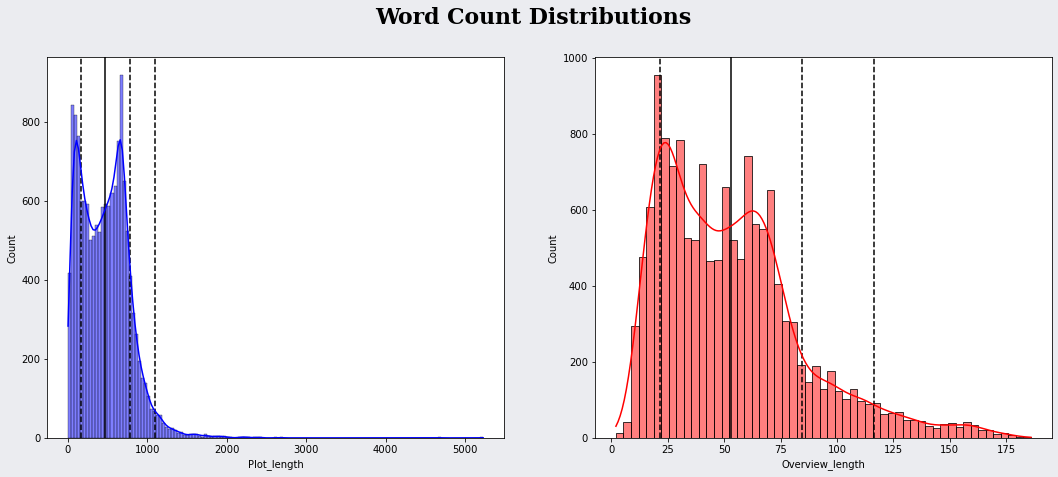

In [8]:
avg_plot_len = determine_avg_length(df, 'Plot')
avg_overview_len = determine_avg_length(df, 'Overview')

plot_std = df['Plot_length'].std()
overview_std = df['Overview_length'].std()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
fig.suptitle('Word Count Distributions', font = 'Serif', weight='bold', color='black', size=22)
fig.patch.set_facecolor('#ebecf0')

ax[0].axvline(avg_plot_len, color='black')
ax[0].axvline(avg_plot_len - plot_std, color='black', linestyle='--')
ax[0].axvline(avg_plot_len + plot_std, color='black', linestyle='--')
ax[0].axvline(avg_plot_len + plot_std * 2, color='black', linestyle='--')
sns.histplot(ax=ax[0], x=df['Plot_length'], color='blue', kde=True)

ax[1].axvline(avg_overview_len, color='black')
ax[1].axvline(avg_overview_len - overview_std, color='black', linestyle='--')
ax[1].axvline(avg_overview_len + overview_std, color='black', linestyle='--')
ax[1].axvline(avg_overview_len + overview_std * 2, color='black', linestyle='--')
sns.histplot(ax=ax[1], x=df['Overview_length'], color='red', kde=True)

print('Average plot length : ' + str(avg_plot_length) + ', Max plot length: ' + str(max_plot) + ', Min plot length: ' + str(min_plot))
print('Average overview length: ' + str(avg_overview_length)  + ', Max overview length: ' + str(max_overview) + ', Min overview length: ' + str(min_overview))
print('The average overview length is ' + str(round(avg_overview_length/avg_plot_length * 100, 2)) + '% of the plot length')

Clearly, we have to drop some of the movies which have too few or too many words in their plot and/or overview.

In [9]:
min_plot_filter = 50
max_plot_filter = 375
min_overview_filter = 10
max_overview_filter = 55

df = df[
    df['Plot_length'].apply(lambda x: x > min_plot_filter) &
    df['Plot_length'].apply(lambda x: x < max_plot_filter) &
    df['Overview_length'].apply(lambda x: x > min_overview_filter) &
    df['Overview_length'].apply(lambda x: x < max_overview_filter) &
    (df['Plot_length'] > df['Overview_length'])
]

In [10]:
df = df.drop(['Plot_length', 'Overview_length'], axis=1)

In [11]:
df = df.reset_index(drop=True)

<a id = '2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Preprocessing</h3>

<a id = '2.1'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Create cleaned and tokenized Plot and Overview columns for potential neural network learning</h3>

We will perform the below preprocessing tasks for our data:

- Convert everything to lowercase
- Remove HTML tags
- Contraction mapping
- Remove (‘s)
- Remove any text inside the parenthesis ( )
- Eliminate punctuations and special characters
- Remove stopwords

In [12]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):

    for row in column:
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()

        # Remove ~ if it occurs more than one time consecutively
        row = re.sub("(~~+)", " ", str(row)).lower()

        # Remove + if it occurs more than one time consecutively
        row = re.sub("(\+\++)", " ", str(row)).lower()

        # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.\.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

        # Remove mailto:
        row = re.sub("(mailto:)", " ", str(row)).lower()

        # Remove \x9* in text
        row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

        # Replace INC nums to INC_NUM
        row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

        # Replace CM# and CHG# to CM_NUM
        row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()

        yield row

In [13]:
processed_plot = text_strip(df['Plot'])
processed_overview = text_strip(df['Overview'])

# Perhaps dont put in the _START_ and _END_

In [14]:
import spacy
from time import time

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
plot = [str(doc) for doc in nlp.pipe(processed_plot, batch_size=5000)]

overview = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_overview, batch_size=5000)]

In [15]:
plot[0]

'the earliest known adaptation of the classic fairytale this films shows jack trading his cow for the beans his mother forcing him to drop them in the front yard and beig forced upstairs as he sleeps jack is visited by fairy who shows him glimpses of what will await him when he ascends the bean stalk in this version jack is the son of deposed king when jack wakes up he finds the beanstalk has grown and he climbs to the top where he enters the giant home the giant finds jack who narrowly escapes the giant chases jack down the bean stalk but jack is able to cut it down before the giant can get to safety he falls and is killed as jack celebrates the fairy then reveals that jack may return home as prince.'

In [16]:
overview[0]

'_START_ abbott and costello version of the famous fairy tale about young boy who trades the family cow for magic beans. _END_'

In [17]:
df['cleaned_plot'] = pd.Series(plot)
df['cleaned_overview'] = pd.Series(overview)

In [18]:
df

,Release Year,Title,Plot,Overview,cleaned_plot,cleaned_overview
0,1902,Jack and the Beanstalk,The earliest known adaptation of the classic f...,Abbott and Costello's version of the famous fa...,the earliest known adaptation of the classic f...,_START_ abbott and costello version of the fam...
1,1905,The Night Before Christmas,Scenes are introduced using lines of the poem....,A cartoon based on the works of Nikolay Gogol....,scenes are introduced using lines of the poem ...,_START_ a cartoon based on the works of nikola...
2,1906,Dream of a Rarebit Fiend,The Rarebit Fiend gorges on Welsh rarebit at a...,Adapted from Winsor McCay's films and comics o...,the rarebit fiend gorges on welsh rarebit at r...,_START_ adapted from winsor mccay films and co...
3,1908,A Christmas Carol,No prints of the first American film adaptatio...,Reginald Owen portrays Charles Dickens' holida...,no prints of the first american film adaptatio...,_START_ reginald owen portrays charles dickens...
4,1910,Ramona,Ramona chronicles the romance between Ramona (...,Half-Indian girl brought up in a wealthy house...,ramona chronicles the romance between ramona m...,_START_ half-indian girl brought up in wealthy...
...,...,...,...,...,...,...
3022,2016,The Age of Shadows,A Korean police captain named Lee Jung-chool (...,Movie follows the activities of the Heroic Cor...,a korean police captain named lee jung-chool s...,_START_ movie follows the activities of the he...
3023,2016,My Annoying Brother,National Judo athlete Doo-young (Do Kyung-soo)...,Doo-Sik (Jo Jung-suk) gets paroled from prison...,national judo athlete doo-young do kyung-soo d...,_START_ doo-sik jo jung-suk gets paroled from ...
3024,2017,Fabricated City,"In real life, Kwon Yoo (Ji Chang-wook) is unem...","In real life, Kwon Yoo is unemployed, but in t...",in real life kwon yoo ji chang-wook is unemplo...,_START_ in real life kwon yoo is unemployed bu...
3025,2017,New Trial,The film tells the story of a man whose life w...,"A taxi driver is found dead, and Hyun-woo, the...",the film tells the story of man whose life was...,_START_ a taxi driver is found dead and hyun-w...


In [19]:
# Add sostok and eostok

df['cleaned_overview'] = df['cleaned_overview'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

df.head(2)

,Release Year,Title,Plot,Overview,cleaned_plot,cleaned_overview
0,1902,Jack and the Beanstalk,The earliest known adaptation of the classic f...,Abbott and Costello's version of the famous fa...,the earliest known adaptation of the classic f...,sostok _START_ abbott and costello version of ...
1,1905,The Night Before Christmas,Scenes are introduced using lines of the poem....,A cartoon based on the works of Nikolay Gogol....,scenes are introduced using lines of the poem ...,sostok _START_ a cartoon based on the works of...


<a id = '4'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Summary</h1>

In [20]:
# save the data to a new csv file
df.to_csv (r'C:\Users\rotzn\gitProjects\DS program\DS projects\cap 3\data\df_final.csv', header=True, index=False)

After loading the data we did some preprocessing for potential use in neural networks. This included many things like removing contractions, tokenization, removing stopwords, etc. After this we did some quick EDA to get a feel for how long we want our summaries to be. We can see from the word count distribution plot that although most of the cleaned_plot and cleaned_overview lengths are less than 600 and 125 words, respectively, we have some really big outliers that we decided to get rid of. We chose only movies whose plot length and overview length was less than 2 standard deviations higher than the mean and less than 1 standard deviation below the mean. After all the filtering, we are left with 3,027 rows.